In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)


In [3]:
df = pd.read_csv('Данные.csv', sep=';')

In [4]:
df.head()

,k,lu,P0,I,gamma,sgamma,r,Psat,Lsat,loptim,lres,loptim/lres,Psat/Pall,Lsat/lu,f,rho,P0/Pall
0,3.89,3.69,12800000.0,80.0,2650.0,0.0,0.0001,1.430000e+08,18.5,2.261250e-08,2.257770e-08,0.001542,0.00132,5.01,0.736,0.000965,1.180000e-04
1,3.89,3.69,12800.0,80.0,1000.0,0.0,0.0001,9.800000e+07,16.7,1.585280e-07,1.580440e-07,0.003065,0.00240,4.52,0.736,0.002550,3.130000e-07
2,3.98,3.69,150000.0,500.0,2830.0,0.0,0.0001,1.130000e+09,20.3,2.061380e-08,2.057220e-08,0.002024,0.00156,5.49,0.735,0.001690,2.070000e-07
3,3.98,3.69,1500000.0,500.0,3160.0,0.0,0.0001,1.100000e+09,18.3,1.648760e-08,1.645770e-08,0.001814,0.00136,4.96,0.735,0.001510,1.850000e-06
4,3.98,3.69,150000.0,500.0,2650.0,0.0,0.0001,1.180000e+09,19.4,2.356200e-08,2.351110e-08,0.002164,0.00175,5.25,0.735,0.001800,2.210000e-07


In [5]:
df = df.dropna()

Look at the power distribution. 

Text(0.5, 1.0, 'Power hist')

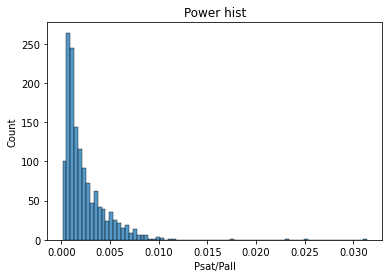

In [6]:
sns.histplot(df, x='Psat/Pall')
plt.title("Power hist")

Delete all the blowout(rho>0.012) 

In [7]:
df = df[df['Psat/Pall']<0.008]

Text(0.5, 1.0, 'Power hist')

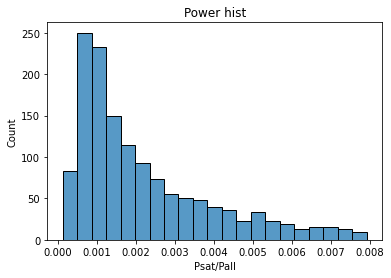

In [8]:
sns.histplot(df, x='Psat/Pall')
plt.title("Power hist")

Create a new feature log(Psat/Pall)

In [9]:
df['log'] = np.log(df[['Psat/Pall']])
df['log0'] = np.log(df['P0']/df['I']/df['gamma']/511000)
df['optim'] = df['loptim/lres']/df['Psat/Pall']

Text(0.5, 1.0, 'Power hist')

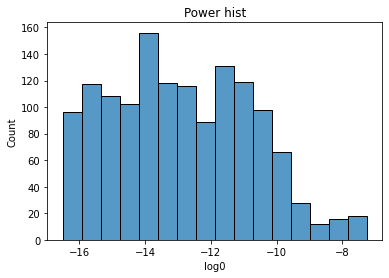

In [10]:
sns.histplot(df, x='log0')
plt.title("Power hist")

Text(0.5, 1.0, 'Power hist')

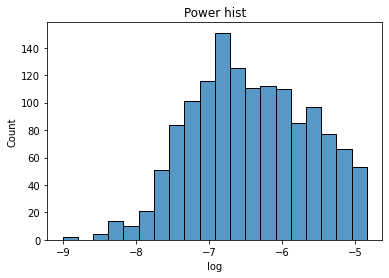

In [11]:
sns.histplot(df, x='log')
plt.title("Power hist")

Text(0.5, 1.0, 'L_sat hist')

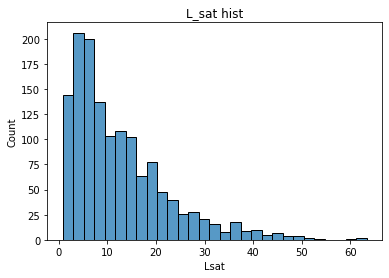

In [12]:
sns.histplot(df, x='Lsat')
plt.title("L_sat hist")

Text(0.5, 1.0, 'L_sat hist')

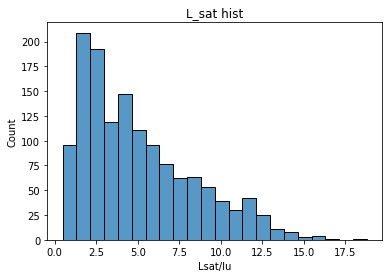

In [13]:
sns.histplot(df, x='Lsat/lu')
plt.title("L_sat hist")

Text(0.5, 1.0, 'lambda')

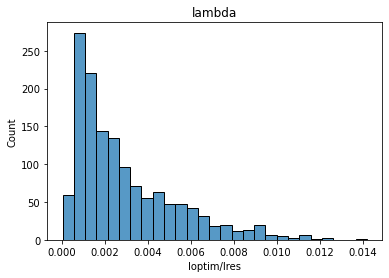

In [14]:
sns.histplot(df, x='loptim/lres')
plt.title("lambda")

Text(0.5, 1.0, 'rho')

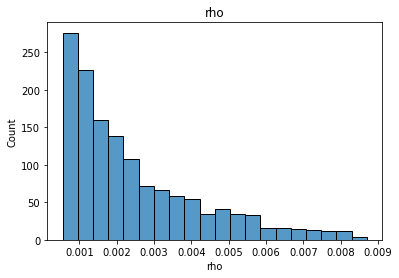

In [15]:
sns.histplot(df, x='rho')
plt.title("rho")

<AxesSubplot:xlabel='optim', ylabel='Count'>

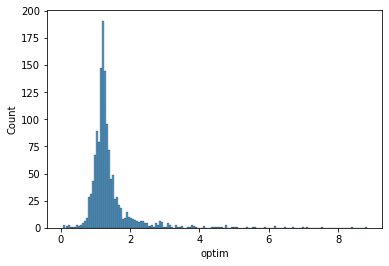

In [16]:
df['optim'] = df['loptim/lres']/df['Psat/Pall']
sns.histplot(df, x='optim')



In [17]:
df = df[df['optim']<2.5]

In [18]:
df1 = df.drop(columns=['P0', 'optim', 'P0/Pall', 'Psat', 'Lsat', 'loptim','lres', 'loptim/lres', 'Psat/Pall', 'Lsat/lu', 'f', 'rho', 'log'])

In [19]:
df1.tail()

,k,lu,I,gamma,sgamma,r,log0
1411,1.24,3.42,500.0,632.0,0.0,0.0005,-11.185636
1412,3.29,2.99,50.0,632.0,0.0,0.0005,-13.695860
1413,3.45,2.99,50.0,894.0,0.0,0.0005,-11.707656
1414,2.63,2.32,6000.0,3000.0,0.0,0.0005,-16.279119
1415,2.63,2.32,6000.0,2650.0,0.0,0.0005,-16.155067


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1, df['log'], test_size=0.2, random_state=42)

In [21]:
def relative_root_mean_squared_error(true, pred):
    num = np.sum(np.square(true - pred))
    den = np.sum(np.square(true))
    squared_error = num/den
    rrmse_loss = np.sqrt(squared_error)
    return rrmse_loss


In [22]:

clf1 = RandomForestRegressor(max_depth=20, random_state=0)
clf1.fit(X_train, y_train)
relative_root_mean_squared_error(np.exp(y_test), np.exp(clf1.predict(X_test)))

0.2673760645188594

Try to scale the data. It doesn't make sense. 

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

clf = RandomForestRegressor(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
relative_root_mean_squared_error(np.exp(y_test), np.exp(clf.predict(X_test)))

0.26744259797783915

Train the classificator for the saturation length.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Lsat/lu'], test_size=0.2, random_state=42)


clf2 = RandomForestRegressor(max_depth=20, random_state=0)
clf2.fit(X_train, y_train)
relative_root_mean_squared_error(y_test, clf2.predict(X_test))

0.14668086200809008

The classificator for the optimum wavelength.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['optim'], test_size=0.2, random_state=42)



clf3 = RandomForestRegressor(max_depth=20, random_state=0)
clf3.fit(X_train, y_train)
relative_root_mean_squared_error(y_test, clf3.predict(X_test))

0.20398618372261157

In [26]:
from scipy.special import jv

X = pd.DataFrame({'k':[2.13], 'lu':[2.8], 'I':[53], 'gamma':[300], 'sgamma':[0.0002], 
                  'r':[0.00012], 'log0':[2000]})

ksi = X['k']**2/(1+X['k']**2/2)/4
f = jv(0,ksi)-jv(1,ksi)

rho = 1/2/(X['gamma'])*(X['I']/X['r']**2/np.pi/4/np.pi/17000*(X['lu']/100*X['k']*f)**2)**(1/3)
X['log0'] = np.log(X['log0']/X['I']/X['gamma']/511000)


print('P_sat=', (np.exp(clf1.predict(X))*X['gamma']*511000*X['I'])[0])
print('L_sat=', (clf2.predict(X)*X['lu'])[0])
print('l_optim=', ((clf3.predict(X)*rho+1)*X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])
print('l_res=', (X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])

P_sat= 15536026.78047904
L_sat= 13.90171999999999
l_optim= 5.108645234358417e-07
l_res= 5.084255555555554e-07


In [27]:
y_pred = clf1.predict(df1)
err = abs(2*(np.exp(y_pred)-df['Psat/Pall'])/(np.exp(y_pred)+df['Psat/Pall']))
err.sort_values()

1241    0.000025
1264    0.000125
1228    0.000127
97      0.000164
1306    0.000230
          ...   
462     0.707171
557     0.736362
766     0.850946
712     1.207606
794     1.285498
Name: Psat/Pall, Length: 1311, dtype: float64

In [28]:
y_pred = clf2.predict(df1)
err = abs(2*(y_pred-df['Lsat/lu'])/(y_pred+df['Lsat/lu']))
err.sort_values().tail(20)

1149    0.469091
978     0.477667
164     0.478123
461     0.503492
1189    0.506870
398     0.509789
439     0.523609
743     0.544819
629     0.547040
132     0.564455
651     0.590878
425     0.616496
718     0.670126
50      0.722572
766     0.747063
219     0.758292
1212    0.817660
749     0.886613
794     1.129206
712     1.160724
Name: Lsat/lu, dtype: float64

In [29]:
y_pred = clf3.predict(df1)
err = abs(2*(y_pred-df['optim'])/(y_pred+df['optim']))
err.sort_values()

1281    0.000120
1272    0.000185
231     0.000203
849     0.000226
959     0.000244
          ...   
1109    1.168055
699     1.282540
686     1.398535
790     1.554267
705     1.683185
Name: optim, Length: 1311, dtype: float64

Do the same with gradient boosting. 

In [30]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from IPython.display import clear_output

In [31]:
def objective(trial, X_train, y_train, X_test, y_test):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'rmse',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = mean_squared_error(y_test, y_pred)
    return accuracy


def objective_cv(trial):
    fold = KFold(n_splits=3, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        scores.append(objective(trial, X.iloc[train_index], y.iloc[train_index],  
                                X.iloc[test_index], y.iloc[test_index]))
        
    return np.mean(scores)
    

In [32]:
X = df1
y = df['log']


In [33]:
study = optuna.create_study(direction='minimize')


[I 2023-03-15 17:52:31,929] A new study created in memory with name: no-name-f80484ab-982e-478a-9a73-1006dee20fdb


In [34]:
study.optimize(objective_cv, n_trials=1000)
clear_output()


In [35]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


Number of finished trials: 1000
Best trial:
  Value: 0.03242614593814372
  Params: 
    max_depth: 1
    learning_rate: 0.537367054528462
    n_estimators: 466
    min_child_weight: 7
    gamma: 2.3364450601143966e-07
    subsample: 0.691562848889024
    colsample_bytree: 0.8835207911472259
    reg_alpha: 1.0714013933869106e-05
    reg_lambda: 3.545109922009703e-08


In [36]:
params = trial.params
model1 = xgb.XGBRegressor(**params)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['log'], test_size=0.2, random_state=42)
model1.fit(X_train,y_train)

relative_root_mean_squared_error(np.exp(y_test), np.exp(model1.predict(X_test)))


0.15954211059800252

In [38]:
def scores(trial,X,y):
    fold = KFold(n_splits=5, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        params = trial.params
        model = xgb.XGBRegressor(**params)
        model.fit(X.iloc[train_index],y.iloc[train_index])
        scores.append(relative_root_mean_squared_error(np.exp(y.iloc[test_index]),
                                                     np.exp(model.predict(X.iloc[test_index]))))

        
    return np.mean(scores)





print(scores(trial,X,y))
    

0.180347270777003


In [39]:
X = df1
y = df['Lsat/lu']

In [40]:
study = optuna.create_study(direction='minimize')

[I 2023-03-15 17:59:15,274] A new study created in memory with name: no-name-04130a8a-26cf-4411-b9da-a8187a26699b


In [41]:
study.optimize(objective_cv, n_trials=1000)
clear_output()


In [42]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 1000
Best trial:
  Value: 0.36492154998937787
  Params: 
    max_depth: 2
    learning_rate: 0.1944012698439677
    n_estimators: 472
    min_child_weight: 3
    gamma: 4.322112740695404e-05
    subsample: 0.648359868598006
    colsample_bytree: 0.7403214795725773
    reg_alpha: 9.191945324022808e-07
    reg_lambda: 0.07308355408283454


In [43]:
params = trial.params
model2 = xgb.XGBRegressor(**params)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Lsat/lu'], test_size=0.2, random_state=42)

In [45]:
model2.fit(X_train, y_train)
relative_root_mean_squared_error(y_test, model2.predict(X_test))

0.10481703701825673

In [46]:
def scores2(trial,X,y):
    fold = KFold(n_splits=5, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        params = trial.params
        model = xgb.XGBRegressor(**params)
        model.fit(X.iloc[train_index],y.iloc[train_index])
        scores.append(relative_root_mean_squared_error((y.iloc[test_index]),
                                                     (model.predict(X.iloc[test_index]))))

        
    return np.mean(scores)





print(scores2(trial,X,y))

0.10052373424343201


In [47]:
X = df1
y = df['optim']

In [48]:
study = optuna.create_study(direction='minimize')

[I 2023-03-15 18:06:32,410] A new study created in memory with name: no-name-e04a15b6-9f10-45ec-9057-f4ea269d6b35


In [49]:
study.optimize(objective_cv, n_trials=1000)
clear_output()


In [50]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 1000
Best trial:
  Value: 0.07818047670245805
  Params: 
    max_depth: 11
    learning_rate: 0.10431683135709632
    n_estimators: 380
    min_child_weight: 7
    gamma: 0.3946847053709947
    subsample: 0.8718969219167501
    colsample_bytree: 0.9990266421233164
    reg_alpha: 5.45449564144752e-07
    reg_lambda: 0.21671842768192268


In [51]:
params = trial.params
model3 = xgb.XGBRegressor(**params)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['optim'], test_size=0.2, random_state=42)

In [53]:
model3.fit(X_train, y_train)
relative_root_mean_squared_error(y_test, model3.predict(X_test))

0.2016555645432156

In [54]:
def scores2(trial,X,y):
    fold = KFold(n_splits=5, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        params = trial.params
        model = xgb.XGBRegressor(**params)
        model.fit(X.iloc[train_index],y.iloc[train_index])
        scores.append(relative_root_mean_squared_error((y.iloc[test_index]),
                                                     (model.predict(X.iloc[test_index]))))

        
    return np.mean(scores)





print(scores2(trial,X,y))

0.21239382066513107


In [55]:
from scipy.special import jv

X = pd.DataFrame({'k':[2.13], 'lu':[2.8], 'I':[53], 'gamma':[300], 'sgamma':[0.0002], 
                  'r':[0.0001], 'log0':[2000]})

ksi = X['k']**2/(1+X['k']**2/2)/4
f = jv(0,ksi)-jv(1,ksi)

rho = 1/2/(X['gamma'])*(X['I']/X['r']**2/np.pi/4/np.pi/17000*(X['lu']/100*X['k']*f)**2)**(1/3)
X['log0'] = np.log(X['log0']/X['I']/X['gamma']/511000)




print('P_sat=', (np.exp(model1.predict(X))*X['gamma']*511000*X['I'])[0])
print('L_sat=', (model2.predict(X)*X['lu'])[0])
print('l_optim=', ((model3.predict(X)*rho+1)*X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])
print('l_res=', (X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])

P_sat= 21687524.668802507
L_sat= 11.450412940979003
l_optim= 5.113194808171138e-07
l_res= 5.084255555555554e-07


In [56]:
len(df)

1311